# Convergence of Algorithms

Many numerical algorithms *converge* to a solution, meaning they produce better and better approximations to a solution.  We'll let $x_\ast$ denote the true solution, and $x_k$ denote the $k$th iterate of an algorithm.  Let $\epsilon_k = |x_k - x_\ast|$ denote the *error*.  An algorithm converges if

$$
\lim_{k\to\infty} \epsilon_k = 0
$$

In practice, we typically don't know the value of $x_\ast$.  We can either truncate the algorithm after $N$ iterations, in which case we estimate $\tilde{\epsilon}_k = |x_k - x_N|$

Alternatively, we can monitor the difference $\delta_k = |x_k - x_{k-1}|$.  If the algorithm is converging, we expect $\delta_k \to 0$ as well, and we can stop the algorithm when $\delta_k$ is sufficiently small.

In this class, we aren't going to worry too much about proving that algorithms converge.  However, we do want to be able verify that an algorithm is converging, measure the *rate* of convergence, and generally compare two algorithms using experimental convergence data.

## Rate of Convergence

There are a [variety of ways](https://en.wikipedia.org/wiki/Rate_of_convergence) in which the rate of convergence is defined.  Mostly, we're interested in the ratio $\epsilon_{k+1} / \epsilon_k$.  We say the convergence of $\epsilon$ is of order $q$ if

$$
\lim_{k\to \infty} \frac{\epsilon_{k+1}}{\epsilon_k^q} < C
$$

for some constant $C> 0$.

* $q = 1$ and $C \in (0,1)$ is called *linear* convergence
* $q = 2$ is called *quadratic* convergence

Larger values of $q$ indicate faster convergence.

Additionally, we have the following terms:
* $q = 1$ and $C = 1$ is called *sublinear* (slower than linear) convergence
* $q > 1$ is *superlinear* (faster than linear) convergence

Clearly, if $q= 1, C > 1$, or if $q < 1$, the sequence actually diverges.


### Measuring the Rate of Convergence

Let's say we have a sequence $\epsilon_k \to 0$.  How might we measure $q$?

Assume we look at large enough $k$ so that the sequence is converging. Note that this potentially may not happen for many iterations.

Let's look at the ratio $\epsilon_{k+1} / \epsilon_{k}^q \approx C$. Taking the logarithm, we have

$\log \epsilon_{k+1} - q \log \epsilon_{k} \approx \log C$

This means that if $q = 1$, the line $\log \epsilon_k$ has slope $\log C$.

If $q > 1$, then $\log \epsilon_k$ will go to $-\infty$ at an exponential rate.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

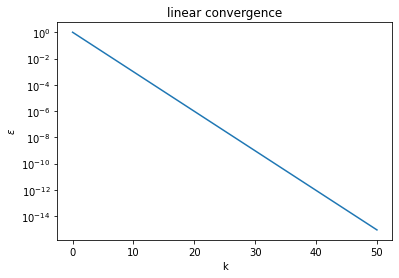

In [2]:
# generates a linearly converging sequence
n = 50
C = 0.5
q = 1
eps1 = [1.0]
for i in range(n):
    eps1.append(C * eps1[-1]**q)

plt.semilogy(eps1)
plt.xlabel('k')
plt.ylabel(r"$\epsilon$")
plt.title("linear convergence")
plt.show()

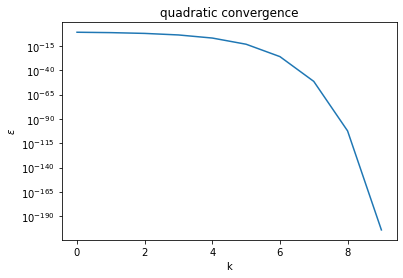

In [5]:
# generates a quadratically converging sequence
n = 9
C = 2.0
q = 2
eps2 = [0.2]
for i in range(n):
    eps2.append(C * eps2[-1]**q)

plt.semilogy(eps2)
plt.xlabel('k')
plt.ylabel(r"$\epsilon$")
plt.title("quadratic convergence")
plt.show()

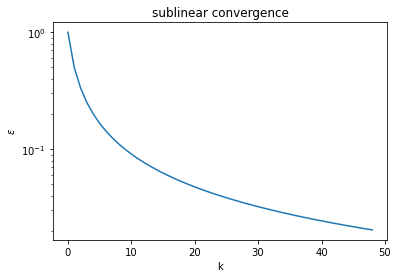

In [6]:
# generates a sub-linear (logarithmic) converging sequence
n = 50
eps3 = []
for k in range(1,n):
    eps3.append(1.0/k)

plt.semilogy(eps3)
plt.xlabel('k')
plt.ylabel(r"$\epsilon$")
plt.title("sublinear convergence")
plt.show()

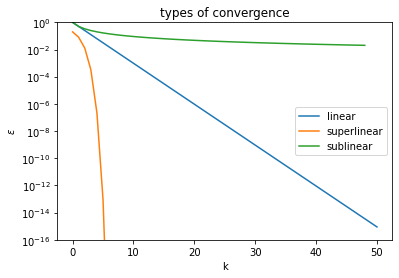

In [7]:
# all three in same plot
plt.semilogy(eps1, label='linear')
plt.semilogy(eps2, label='superlinear')
plt.semilogy(eps3, label='sublinear')
plt.xlabel('k')
plt.ylabel(r"$\epsilon$")
plt.ylim(1e-16, 1e0)
plt.title("types of convergence")
plt.legend()
plt.show()

### Estimating q

There are a variety of ways to estimate $q$.  A rough, but easy estimate comes from finding the slope of the sequence $\log|\log(\epsilon_{k+1}/\epsilon_k)| = \log|\log \epsilon_{k+1} - \log \epsilon_k|$. Because $\epsilon_k$ shrinks exponentially (asymptotically) with base $1/q$.  The slope of the line will be $\log q$, from which we can estimate $q$.

In [8]:
def estimate_q(eps):
    """
    estimate rate of convergence q from sequence esp
    """
    x = np.arange(len(eps) -1)
    y = np.log(np.abs(np.diff(np.log(eps))))
    line = np.polyfit(x, y, 1) # fit degree 1 polynomial
    q = np.exp(line[0]) # find q
    return q

In [9]:
print(estimate_q(eps1)) # linear
print(estimate_q(eps2)) # quadratic
print(estimate_q(eps3)) # sublinear

1.0
2.0
0.9466399163308074


### Exercises

1. Generate a converging sequence with $q = 1.5$, and estimate $q$ using the above method
2. Generate sublinear sequences with $\epsilon_k = 1/k$ (as above) for lengths 50, 100, 500, 1000, 5000, and 10000. How does our estimate of $q$ change with the length of the sequence?

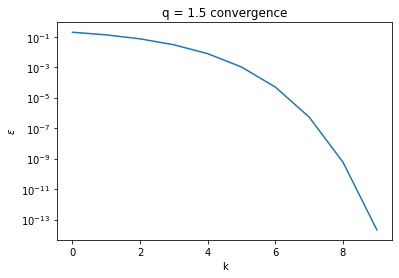

In [14]:
# generates a quadratically converging sequence
n = 9
C = 1.5
q = 1.5
eps2 = [0.2]
for i in range(n):
    eps2.append(C * eps2[-1]**q)

plt.semilogy(eps2)
plt.xlabel('k')
plt.ylabel(r"$\epsilon$")
plt.title("q = {} convergence".format(q))
plt.show()

In [11]:
def gen_sublinear(n):
    eps = []
    for k in range(1,n):
        eps.append(1.0/k)
    return eps

ns = [50, 100, 500, 1000, 5000, 10000]
for n in ns:
    eps = gen_sublinear(n)
    print(estimate_q(eps))
    

0.9466399163308074
0.9720402367424485
0.994118748919332
0.9970337839193604
0.9994017352310425
0.9997004753046203
